<a href="https://colab.research.google.com/github/Affan75/Association-Rule-Assignment/blob/main/Association_Rule_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [33]:
sns.set(style="darkgrid", color_codes=True)
pd.set_option('display.max_columns', 75)

In [34]:
data = pd.read_excel('Online retail.xlsx', header = None)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
dtypes: object(1)
memory usage: 58.7+ KB


In [35]:
data.head()


,0
0,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,"burgers,meatballs,eggs"
2,chutney
3,"turkey,avocado"
4,"mineral water,milk,energy bar,whole wheat rice..."


In [36]:
data.describe()

,0
count,7501
unique,5176
top,cookies
freq,223


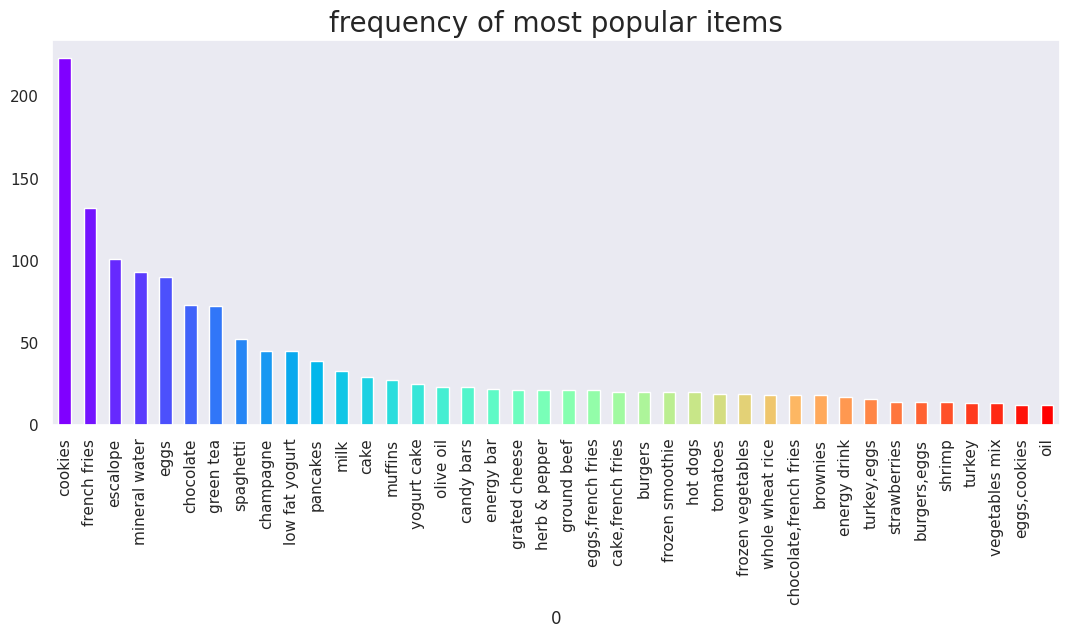

In [37]:
color = plt.cm.rainbow(np.linspace(0, 1, 40))
data[0].value_counts().head(40).plot.bar(color = color, figsize=(13,5))
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [38]:
import networkx as nx
data['Food'] = 'Food'
food = data.truncate(before = -1, after = 15)
food = nx.from_pandas_edgelist(food, source = 'Food', target = 0, edge_attr = False)

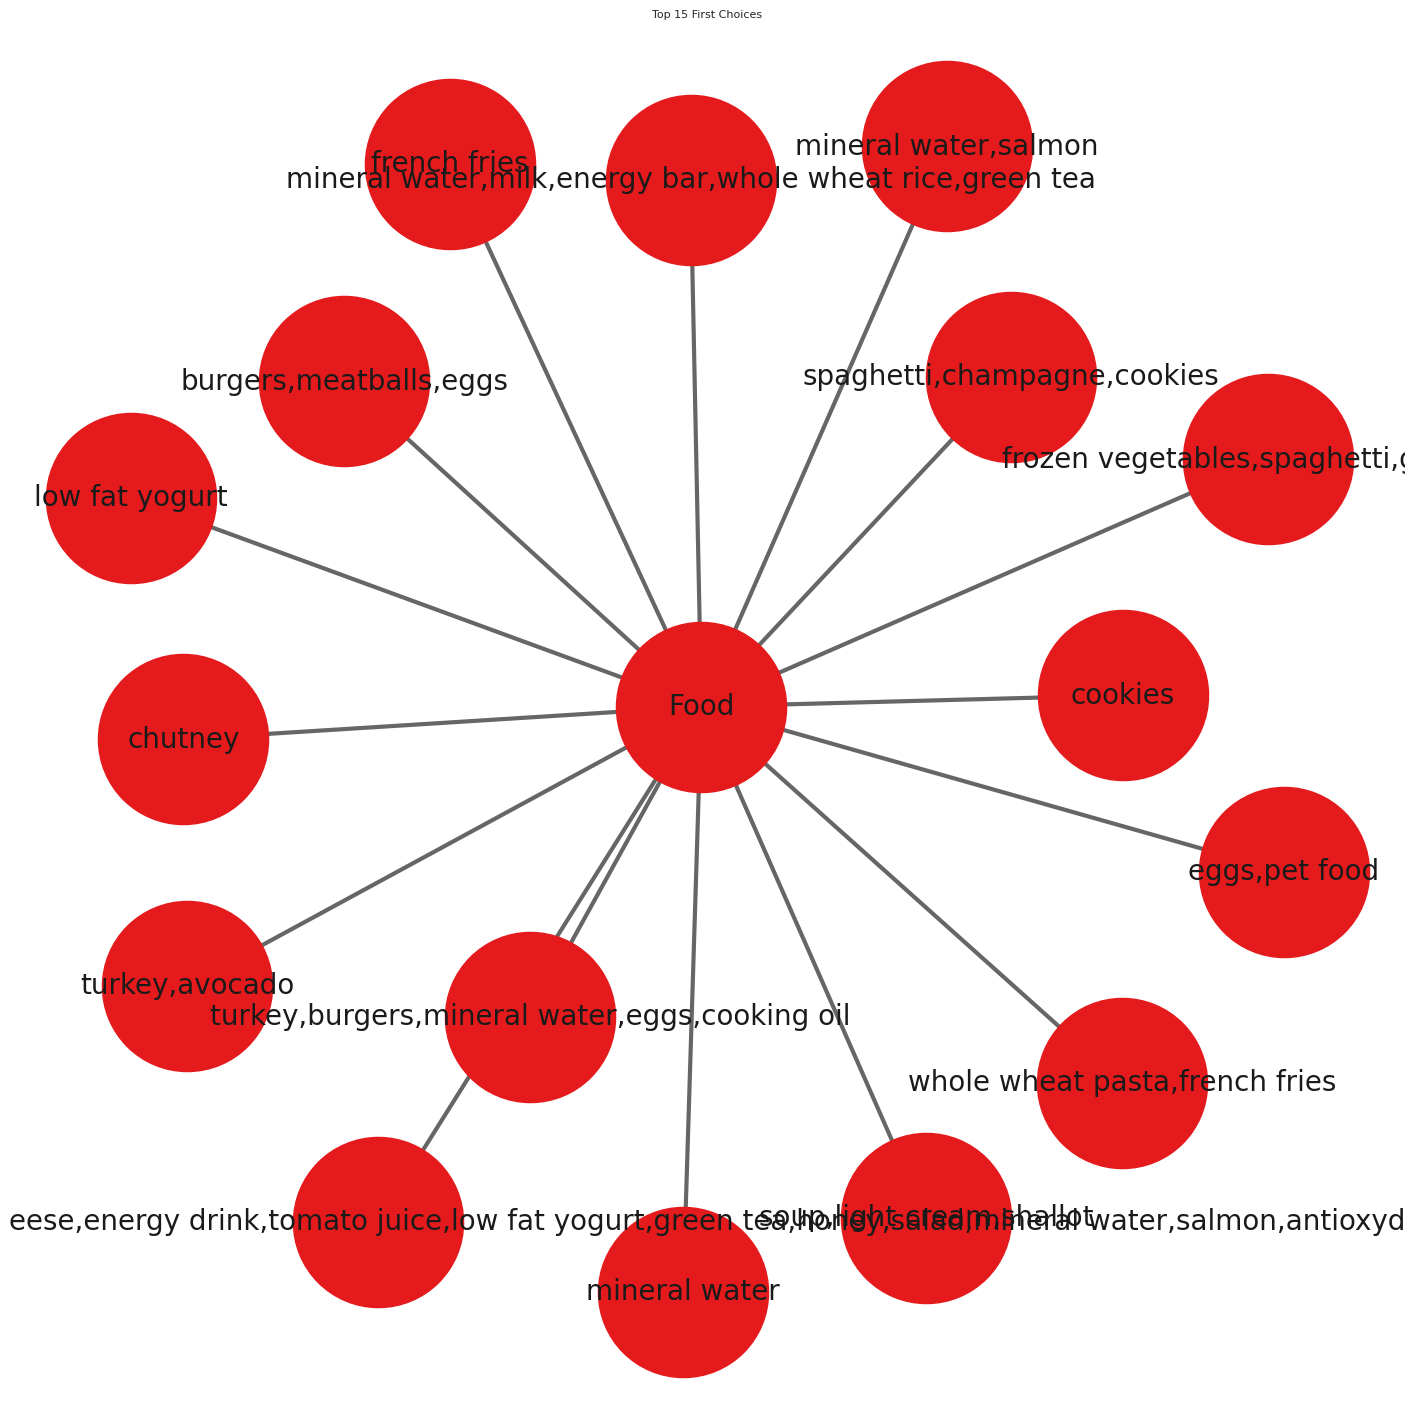

In [39]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (18, 18)
pos = nx.spring_layout(food)
color = plt.cm.Set1(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(food, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(food, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(food, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 First Choices', fontsize =8)
plt.show()

In [40]:
transactions = []
for i in range(0, len(data)):
    transactions.append([str(data.values[i,j]) for j in range(0, len(data.columns))])

In [41]:
transactions[:1]

[['shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil',
  'Food']]

In [42]:
from itertools import permutations

# Extract unique items.
flattened = [item for transaction in transactions for item in transaction]
items = list(set(flattened))

In [43]:
print('# of items:',len(items))
print(list(items))

# of items: 5177
['tomatoes,mineral water,olive oil', 'fresh tuna,ground beef,pepper,tomato sauce,chicken,soda,mint', 'spaghetti,muffins,whole wheat rice,french fries,mayonnaise,low fat yogurt', 'frozen vegetables,meatballs,pancakes,eggs,chocolate,french fries,frozen smoothie', 'eggs,chicken,green tea,french fries', 'herb & pepper,ground beef,soup,avocado,brownies,salt', 'vegetables mix,cake,rice', 'chocolate,pepper,spaghetti,mineral water,whole wheat rice,champagne,mushroom cream sauce', 'frozen vegetables,milk,cider,whole wheat rice', 'frozen vegetables,tomatoes,mineral water,eggs,whole wheat rice,french fries,strawberries', 'energy bar,eggs,cottage cheese,green tea', 'turkey,shrimp,pasta,pepper,spaghetti,mineral water,eggs,chicken,french fries', 'muffins,hot dogs,brownies', 'tomato sauce,mint', 'whole wheat pasta,salmon,vegetables mix', 'frozen vegetables,spaghetti,mineral water,milk,black tea,french wine,cider,chutney,salmon', 'turkey,honey,cake,clothes accessories,french fries,gre

In [44]:
if 'nan' in items: items.remove('nan')
print(list(items))

['tomatoes,mineral water,olive oil', 'fresh tuna,ground beef,pepper,tomato sauce,chicken,soda,mint', 'spaghetti,muffins,whole wheat rice,french fries,mayonnaise,low fat yogurt', 'frozen vegetables,meatballs,pancakes,eggs,chocolate,french fries,frozen smoothie', 'eggs,chicken,green tea,french fries', 'herb & pepper,ground beef,soup,avocado,brownies,salt', 'vegetables mix,cake,rice', 'chocolate,pepper,spaghetti,mineral water,whole wheat rice,champagne,mushroom cream sauce', 'frozen vegetables,milk,cider,whole wheat rice', 'frozen vegetables,tomatoes,mineral water,eggs,whole wheat rice,french fries,strawberries', 'energy bar,eggs,cottage cheese,green tea', 'turkey,shrimp,pasta,pepper,spaghetti,mineral water,eggs,chicken,french fries', 'muffins,hot dogs,brownies', 'tomato sauce,mint', 'whole wheat pasta,salmon,vegetables mix', 'frozen vegetables,spaghetti,mineral water,milk,black tea,french wine,cider,chutney,salmon', 'turkey,honey,cake,clothes accessories,french fries,green tea', 'burgers

In [45]:
print(list(items))

['tomatoes,mineral water,olive oil', 'fresh tuna,ground beef,pepper,tomato sauce,chicken,soda,mint', 'spaghetti,muffins,whole wheat rice,french fries,mayonnaise,low fat yogurt', 'frozen vegetables,meatballs,pancakes,eggs,chocolate,french fries,frozen smoothie', 'eggs,chicken,green tea,french fries', 'herb & pepper,ground beef,soup,avocado,brownies,salt', 'vegetables mix,cake,rice', 'chocolate,pepper,spaghetti,mineral water,whole wheat rice,champagne,mushroom cream sauce', 'frozen vegetables,milk,cider,whole wheat rice', 'frozen vegetables,tomatoes,mineral water,eggs,whole wheat rice,french fries,strawberries', 'energy bar,eggs,cottage cheese,green tea', 'turkey,shrimp,pasta,pepper,spaghetti,mineral water,eggs,chicken,french fries', 'muffins,hot dogs,brownies', 'tomato sauce,mint', 'whole wheat pasta,salmon,vegetables mix', 'frozen vegetables,spaghetti,mineral water,milk,black tea,french wine,cider,chutney,salmon', 'turkey,honey,cake,clothes accessories,french fries,green tea', 'burgers

In [46]:
rules = list(permutations(items, 2))
print('# of rules:',len(rules))
print(rules[:5])

# of rules: 26796152
[('tomatoes,mineral water,olive oil', 'fresh tuna,ground beef,pepper,tomato sauce,chicken,soda,mint'), ('tomatoes,mineral water,olive oil', 'spaghetti,muffins,whole wheat rice,french fries,mayonnaise,low fat yogurt'), ('tomatoes,mineral water,olive oil', 'frozen vegetables,meatballs,pancakes,eggs,chocolate,french fries,frozen smoothie'), ('tomatoes,mineral water,olive oil', 'eggs,chicken,green tea,french fries'), ('tomatoes,mineral water,olive oil', 'herb & pepper,ground beef,soup,avocado,brownies,salt')]


In [47]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

transactions = [
    ['milk', 'bread', 'eggs'],
    ['bread', 'butter', 'jam'],
    ['milk', 'bread', 'butter', 'jam'],
    ['eggs', 'bread', 'butter'],
    ['milk', 'bread', 'butter'],
    ['eggs', 'bread', 'milk']]

encoder = TransactionEncoder()
onehot = encoder.fit_transform(transactions)

onehot_df = pd.DataFrame(onehot, columns=encoder.columns_)

print(onehot_df)


   bread  butter   eggs    jam   milk
0   True   False   True  False   True
1   True    True  False   True  False
2   True    True  False   True   True
3   True    True   True  False  False
4   True    True  False  False   True
5   True   False   True  False   True


In [48]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

encoder = TransactionEncoder()
onehot = encoder.fit_transform(transactions)

onehot_df = pd.DataFrame(onehot, columns=encoder.columns_)

if 'nan' in onehot_df.columns:
    onehot_df = onehot_df.drop('nan', axis=1)

print(onehot_df.head())


   bread  butter   eggs    jam   milk
0   True   False   True  False   True
1   True    True  False   True  False
2   True    True  False   True   True
3   True    True   True  False  False
4   True    True  False  False   True


In [49]:
from mlxtend.preprocessing import TransactionEncoder

encoder = TransactionEncoder().fit(transactions)

onehot = encoder.transform(transactions)

onehot = pd.DataFrame(onehot, columns = encoder.columns_)

onehot.head()


,bread,butter,eggs,jam,milk
0,True,False,True,False,True
1,True,True,False,True,False
2,True,True,False,True,True
3,True,True,True,False,False
4,True,True,False,False,True


In [50]:
support = onehot.mean()
support = pd.DataFrame(support, columns=['support']).sort_values('support',ascending=False)

support.head()

,support
bread,1.000000
butter,0.666667
milk,0.666667
eggs,0.500000
jam,0.333333


In [51]:
support.describe()

,support
count,5.000000
mean,0.633333
std,0.247207
min,0.333333
25%,0.500000
50%,0.666667
75%,0.666667
max,1.000000


In [52]:
supportBF = np.logical_and(onehot['bread'], onehot['butter']).mean()

supportBM = np.logical_and(onehot['bread'], onehot['milk']).mean()

supportFM = np.logical_and(onehot['milk'], onehot['eggs']).mean()

print("bread and butter: %.2f" % supportBF)
print("bread and milk: %.2f" % supportBM)
print("milk and eggs: %.2f" % supportFM)

bread and butter: 0.67
bread and milk: 0.67
milk and eggs: 0.33


In [53]:
onehot['bread+milk'] = np.logical_and(onehot['bread'], onehot['milk'])

support = onehot.mean()
val = support.loc['bread+milk']

print(f'bread+milk = {val}')

bread+milk = 0.6666666666666666


In [54]:
supportMF = np.logical_and(onehot['bread'], onehot['milk']).mean()

supportM = onehot['bread'].mean()

supportF = onehot['milk'].mean()

confidenceMM = supportMF / supportM
confidenceMF = supportMF / supportF

print('bread= {0:.2f},milk = {1:.2f}'.format(confidenceMM, confidenceMF))

bread= 0.67,milk = 1.00


In [55]:
lift = supportMF / (supportM * supportF)

print("Lift: %.2f" % lift)

Lift: 1.00


In [56]:
supportBF = np.logical_and(onehot['bread'], onehot['butter']).mean()

supportB = onehot['bread'].mean()

supportnF = 1.0 - onehot['butter'].mean()

supportBnF = supportB - supportBF

conviction = supportB * supportnF / supportBnF
print("Conviction: %.2f" % conviction)

Conviction: 1.00


In [57]:
def conviction(antecedent, consequent):
    supportAC = np.logical_and(antecedent, consequent).mean()

    supportA = antecedent.mean()

    supportnC = 1.0 - consequent.mean()

    supportAnC = supportA - supportAC

    return supportA * supportnC / supportAnC

In [58]:
def leverage(antecedent, consequent):
    supportAB = np.logical_and(antecedent, consequent).mean()

    supportA = antecedent.mean()

    supportB = consequent.mean()

    return supportAB - supportB * supportA

In [59]:
convictionBF = conviction(onehot['milk'], onehot['eggs'])
convictionFB = conviction(onehot['bread'], onehot['butter'])

convictionBM = conviction(onehot['milk'], onehot['eggs'])
convictionMB = conviction(onehot['bread'], onehot['butter'])

convictionFM = conviction(onehot['milk'], onehot['eggs'])
convictionMF = conviction(onehot['bread'], onehot['butter'])

print('milk ->eggs: ', convictionFB)
print('bread -> butter: ', convictionBF)

milk ->eggs:  1.0
bread -> butter:  1.0


In [60]:
supportT = onehot['milk'].mean()
supportP = onehot['eggs'].mean()

supportTP = np.logical_and(onehot['bread'], onehot['butter']).mean()

numerator = supportTP - supportT*supportP
denominator = max(supportTP*(1-supportT), supportT*(supportP-supportTP))

zhang = numerator / denominator
print(zhang)

1.4999999999999998


In [61]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

transactions = [
    ['milk', 'bread', 'eggs'],
    ['bread', 'butter', 'jam'],
    ['milk', 'bread', 'butter', 'jam'],
    ['eggs', 'bread', 'butter'],
    ['milk', 'bread', 'butter'],
    ['eggs', 'bread', 'milk']]

encoder = TransactionEncoder()
onehot = encoder.fit_transform(transactions)
onehot_df = pd.DataFrame(onehot, columns=encoder.columns_)

frequent_itemsets = apriori(onehot_df, min_support=0.2, use_colnames=True)

print("Frequent Itemsets:")
print(frequent_itemsets)

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

print("\nAssociation Rules:")
print(rules)


Frequent Itemsets:
     support               itemsets
0   1.000000                (bread)
1   0.666667               (butter)
2   0.500000                 (eggs)
3   0.333333                  (jam)
4   0.666667                 (milk)
5   0.666667        (bread, butter)
6   0.500000          (bread, eggs)
7   0.333333           (bread, jam)
8   0.666667          (bread, milk)
9   0.333333          (butter, jam)
10  0.333333         (milk, butter)
11  0.333333           (eggs, milk)
12  0.333333   (bread, butter, jam)
13  0.333333  (bread, milk, butter)
14  0.333333    (bread, milk, eggs)

Association Rules:
      antecedents      consequents  antecedent support  consequent support  \
0        (butter)          (bread)            0.666667            1.000000   
1          (eggs)          (bread)            0.500000            1.000000   
2           (jam)          (bread)            0.333333            1.000000   
3          (milk)          (bread)            0.666667            1.00000

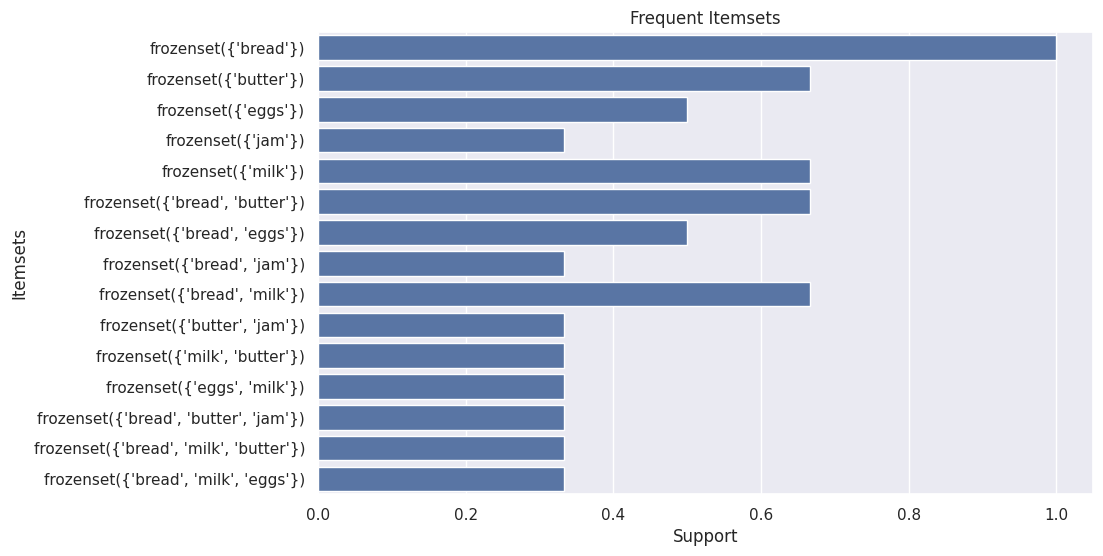

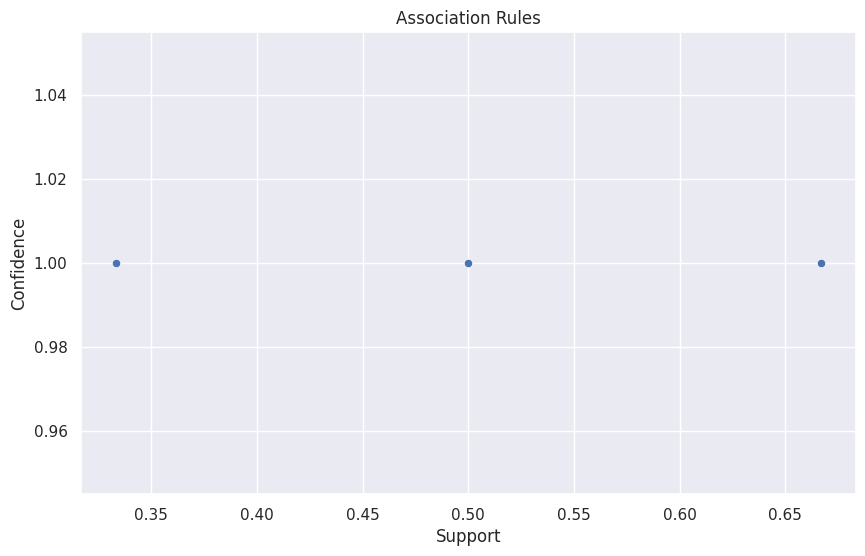

In [62]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

transactions = [
    ['milk', 'bread', 'eggs'],
    ['bread', 'butter', 'jam'],
    ['milk', 'bread', 'butter', 'jam'],
    ['eggs', 'bread', 'butter'],
    ['milk', 'bread', 'butter'],
    ['eggs', 'bread', 'milk']]

encoder = TransactionEncoder()
onehot = encoder.fit_transform(transactions)
onehot_df = pd.DataFrame(onehot, columns=encoder.columns_)

frequent_itemsets = apriori(onehot_df, min_support=0.2, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

plt.figure(figsize=(10, 6))
sns.barplot(x='support', y='itemsets', data=frequent_itemsets)
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.title('Frequent Itemsets')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='support', y='confidence', data=rules)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules')
plt.show()
